# **Assignment 8 - Ross Boehme**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

The New York Police Department (NYPD) is the largest police force in the world with more than [36,000 officers](https://www.nyc.gov/site/nypd/about/about-nypd/about-nypd-landing.page), enforcing laws in one of the largest cities in the world, New York, home to more than [8.3 million](https://www.nyc.gov/assets/planning/download/pdf/planning-level/nyc-population/population-estimates/current-population-estimates-2022.pdf?r=a). I want to look at arrest data to identify which areas in New York City are disproportionately seeing youth arrests, for what crimes, and what could be done to ameliorate the issue. For example, neighborhoods with high rates of youth violence could institute after school programs. If arrests increase in the certain months, those months in particular should have targeted after-school programs.

Dataset: "NYPD Arrest Data (Year to Date)." Link to data: https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

Link to data dictionary: https://data.cityofnewyork.us/api/views/uip8-fykc/files/62a746df-66ca-4603-aae4-46c02bac2972?download=true&filename=NYPD_Arrest_Incident_Level_Data_Footnotes.pdf

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Using JSON to make the workbook scale for other users
df = pd.DataFrame(requests.get("https://data.cityofnewyork.us/resource/uip8-fykc.json?$limit=250000").json())

My initial dataset has 112,571 rows, which is arrest data through July 14, 2023 (unsure why it hasn't continued to be updated)

In [2]:
df.shape

(112571, 24)

Looking at my columns and head, there are many which aren't intuitively named or relevant to my analysis. 

In [3]:
df.columns

Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'geocoded_column',
       ':@computed_region_f5dn_yrer', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi'],
      dtype='object')

In [4]:
df.head()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,...,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi
0,263238742,2023-02-08T00:00:00.000,380,"ROBBERY,CAR JACKING",105,ROBBERY,PL 1601003,F,K,62,...,989904,156928,40.597407,-73.979638,"{'type': 'Point', 'coordinates': [-73.979638, ...",1,2,45,37,18183
1,265590985,2023-03-24T00:00:00.000,155,RAPE 2,104,RAPE,PL 1303001,F,S,120,...,962873,174172,40.6447209438691,-74.0770327198983,"{'type': 'Point', 'coordinates': [-74.07703271...",4,1,13,74,10369
2,265798132,2023-03-28T00:00:00.000,157,RAPE 1,104,RAPE,PL 1303501,F,S,120,...,962873,174172,40.6447209438691,-74.0770327198983,"{'type': 'Point', 'coordinates': [-74.07703271...",4,1,13,74,10369
3,269233687,2023-06-02T00:00:00.000,157,RAPE 1,104,RAPE,PL 1303501,F,Q,110,...,1019164,210169,40.7434812638841,-73.8740035373971,"{'type': 'Point', 'coordinates': [-73.87400353...",66,3,5,68,14784
4,270519574,2023-06-28T00:00:00.000,157,RAPE 1,104,RAPE,PL 1303501,F,K,84,...,988902,192641,40.6954388081238,-73.9832253756043,"{'type': 'Point', 'coordinates': [-73.98322537...",68,2,48,54,16865


First I'll rename a few columns to make the data calls more intuitive and easier to understand for someone reading my Jupyter notebook. I'll rename based on the dataset's [data dictionary](https://data.cityofnewyork.us/api/views/uip8-fykc/files/62a746df-66ca-4603-aae4-46c02bac2972?download=true&filename=NYPD_Arrest_Incident_Level_Data_Footnotes.pdf).

In [5]:
df.columns = ['arrest_id' #Randomly generated ID for each arrest
,'arrest_date'
,'crime_id' #Three digit internal classification code (more granular than Key Code)
,'crime' #Description of internal classification corresponding with PD code (more granular than Offense Description)
,'crime_category_id' #Three digit internal classification code (more general category than PD code)
,'crime_category' #Description of internal classification corresponding with KY code (more general category than PD description
,'law_code' #Law code charges corresponding to the NYS Penal Law,VTL and other various local laws
,'offense_level' #Level of offense: felony, misdemeanor, violation
,'borough' #Borough of arrest
,'precinct' #Precinct where arrest occured
,'jurisdiction_code' #Jurisdiction responsible for arrest. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions
,'perp_age' #Perpetrator’s age within a category
,'perp_sex'
,'perp_race'
,'x_coordinate'
,'y_coordinate'
,'latitude'
,'longitude'
,'geospatial_code1'
,'geospatial_code2'
,'geospatial_code3'
,'geospatial_code4'
,'geospatial_code5'
,'geospatial_code6']

Now I'll remove columns not relevant to my analysis to make the summary statistics more useful.

In [6]:
df = df[['arrest_date','crime','crime_category','offense_level','borough','perp_age','perp_sex']]

Checking data types. They're all "object" which is fine except "arrest_date" which should be a datetime

In [7]:
df.dtypes

arrest_date       object
crime             object
crime_category    object
offense_level     object
borough           object
perp_age          object
perp_sex          object
dtype: object

In [8]:
#Converting to time series and extracting date from datetime
df['arrest_date'] = pd.to_datetime(df['arrest_date'])
df['arrest_date'] = df['arrest_date'].dt.date

One last step before creating summary stats: offense_level, borough, and perp_sex all have abbreviations instead of full qualitiative values (e.g. "F" for "Felony"; "K" for King's County; "M" for "Male"). I want to map these abbreviations to full values for clarity when doing graphs and summary stats.

In [9]:
df['offense_level'] = df['offense_level'].replace({
    'F': 'Felony',
    'M': 'Misdemeanor',
    'V': 'Violation'
})

df['borough'] = df['borough'].replace({
    'K':'Brooklyn',
    'Q':'Queens',
    'S': 'Staten Island',
    'M':'Manhattan',
    'B':'Bronx'
})

df['perp_sex'] = df['perp_sex'].replace({
    'M':'Male',
    'F':'Female',
})

In [10]:
df.head()

,arrest_date,crime,crime_category,offense_level,borough,perp_age,perp_sex
0,2023-02-08,"ROBBERY,CAR JACKING",ROBBERY,Felony,Brooklyn,25-44,Female
1,2023-03-24,RAPE 2,RAPE,Felony,Staten Island,18-24,Male
2,2023-03-28,RAPE 1,RAPE,Felony,Staten Island,25-44,Male
3,2023-06-02,RAPE 1,RAPE,Felony,Queens,25-44,Male
4,2023-06-28,RAPE 1,RAPE,Felony,Brooklyn,25-44,Male


In [11]:
df.columns = ['arrest_date','crime','crime_category','offense_level','borough','perp_age','perp_sex']

Now using describe function to get a sense of my targeted dataset.
- The arrest_date with the most arrests was May 3rd, 2023 (983 of 112,571 total arrests)
- There were 233 different "crimes", under 63 different "categories"
- The most common borough for arrests was Brooklyn (31,104 of 112,571 total arrests)
- The most common perpetrator age was 25-44 (64,832 of 112,571 total arrests)
- The most common perpetrator sex was male (90,596 of 112,571 total arrests)

Now looking for missing values. Only offense_level has missing values. 

In [12]:
print(df.isna().sum())

arrest_date         0
crime               0
crime_category      0
offense_level     846
borough             0
perp_age            0
perp_sex            0
dtype: int64


Looking at value_counts, in addition to missing values there are values of "9" and "I" which aren't in the data dictionary. I'll  re-assign allvalues of "9", "I", and NA to be "Unknown".

In [13]:
df.offense_level.value_counts()

Misdemeanor    62259
Felony         48396
Violation        624
9                318
I                128
Name: offense_level, dtype: int64

In [14]:
df['offense_level'] = df['offense_level'].replace({'9': 'Unknown', 'I': 'Unknown'})
df['offense_level'] = df['offense_level'].fillna('Unknown')

In [15]:
df.offense_level.value_counts() #Ensuring correction -- looks good

Misdemeanor    62259
Felony         48396
Unknown         1292
Violation        624
Name: offense_level, dtype: int64

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

I performed my wrangling with my data exploration above so that the data exploration could be more focused and the summary statistics would be useful to my eventual findings. Showing my clean data below. 

In [16]:
df.head()

,arrest_date,crime,crime_category,offense_level,borough,perp_age,perp_sex
0,2023-02-08,"ROBBERY,CAR JACKING",ROBBERY,Felony,Brooklyn,25-44,Female
1,2023-03-24,RAPE 2,RAPE,Felony,Staten Island,18-24,Male
2,2023-03-28,RAPE 1,RAPE,Felony,Staten Island,25-44,Male
3,2023-06-02,RAPE 1,RAPE,Felony,Queens,25-44,Male
4,2023-06-28,RAPE 1,RAPE,Felony,Brooklyn,25-44,Male


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

<b>Bolded below which characteristics the first plot has</b>, <i>italicized which characteristics the second plot has</i>
*   <b>Use and change a legend position</b>
*   Change a legend font size
*   <b>Place a legend outside of the plot</b>
*   Create a single legend for all subplots
*   <i><b>Change the title and x/y labels</b></i>
*   <i>Change the marker, line colors, and line width</i>
*   Add annotations
*   <b>Modify Axis Text Ticks/Labels</b>
*   <i><b>Change size of axis Labels</b><i>
*   <i>Flip Axis (for bar chart)</i>
*   <i>Add thousand formatting to axis</i>
*   <b> Add percentage formatting to axis</b>

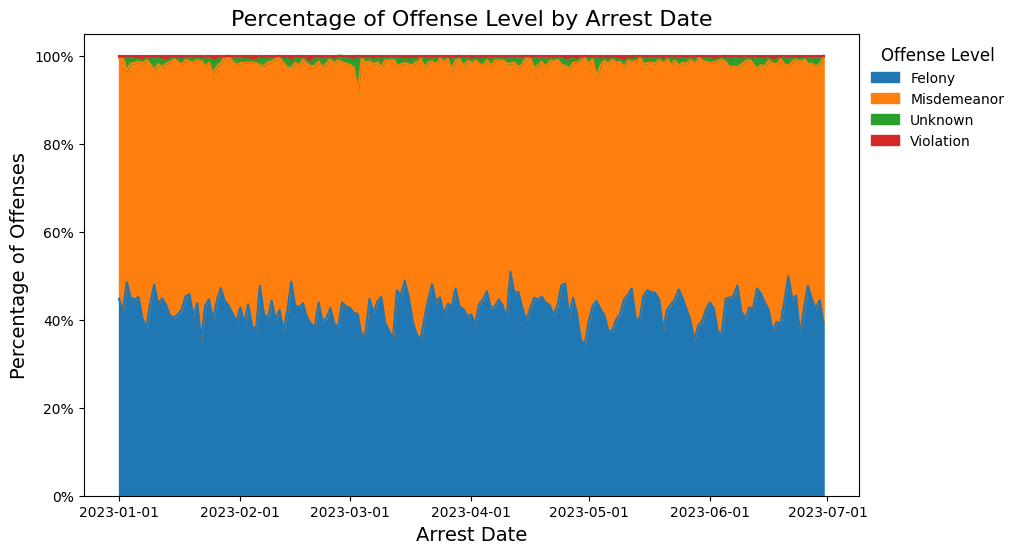

In [17]:
#For formatting y axis
from matplotlib.ticker import PercentFormatter

#Calculating offense percentage of total from grouped df
offense_count = df.groupby(['arrest_date', 'offense_level']).size().unstack(fill_value=0)
offense_percentage = offense_count.div(offense_count.sum(axis=1), axis=0)

#Plotting
fig, ax = plt.subplots(figsize=(10, 6))

#Setting date format for x axis
date_form = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

#Creating stacked bar chart
offense_percentage.plot.area(ax=ax, stacked=True)
ax.yaxis.set_major_formatter(PercentFormatter(1))

#Label axes and title
#Set legend outside chart
#Change tick label size
ax.set_title('Percentage of Offense Level by Arrest Date', fontsize=16)
ax.set_xlabel('Arrest Date', fontsize=14)
ax.set_ylabel('Percentage of Offenses', fontsize=14)
plt.legend(title='Offense Level', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
ax.tick_params(axis='both', which='major', labelsize=10)

#Showing plot
plt.show()

In [18]:
crime_counts = df['crime_category'].value_counts().head(10)

In [19]:
type(crime_counts)

pandas.core.series.Series

In [20]:
crime_counts

ASSAULT 3 & RELATED OFFENSES      16619
PETIT LARCENY                     12070
FELONY ASSAULT                    10474
DANGEROUS DRUGS                    7530
MISCELLANEOUS PENAL LAW            7327
VEHICLE AND TRAFFIC LAWS           6612
CRIMINAL MISCHIEF & RELATED OF     5515
ROBBERY                            5368
GRAND LARCENY                      5074
DANGEROUS WEAPONS                  4639
Name: crime_category, dtype: int64

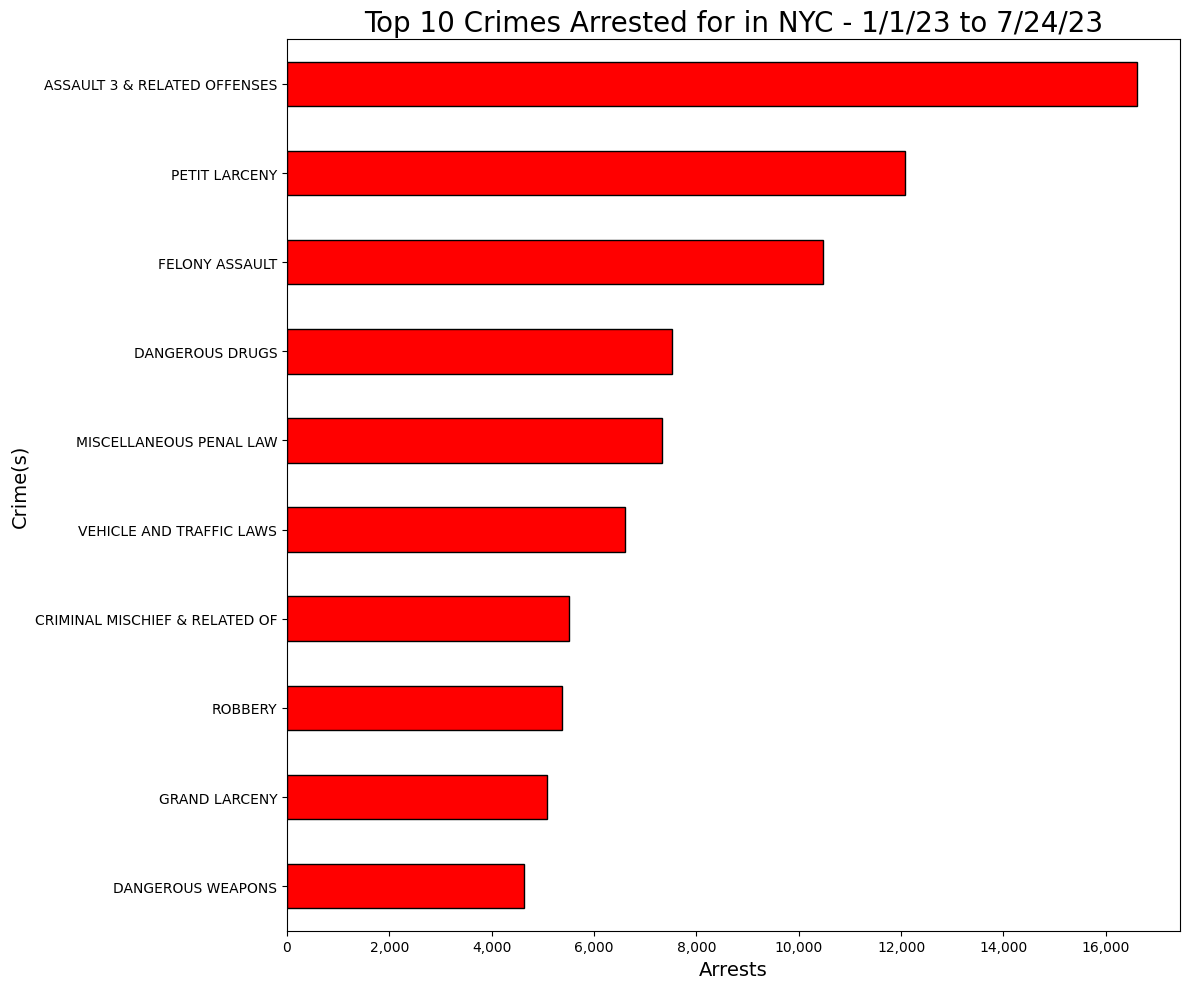

In [21]:
plt.figure(figsize=(12, 10))
crime_counts.plot(kind='barh', color='red', edgecolor='black')

ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.xlabel('Arrests', fontsize=14)
plt.ylabel('Crime(s)', fontsize=14)
plt.title('Top 10 Crimes Arrested for in NYC - 1/1/23 to 7/24/23',fontsize=20)
plt.gca().invert_yaxis()  # To have the highest counts at the top
plt.tight_layout()
plt.show()

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


Seaborn doesn't have a 100% stacked area chart so I'll make it into a 100% stacked bar chart. I will showcase the same properties as I did for the prior charts.

<b>Bolded below which characteristics the first plot has</b>, <i>italicized which characteristics the second plot has</i>
*   <b>Use and change a legend position</b>
*   Change a legend font size
*   <b>Place a legend outside of the plot</b>
*   Create a single legend for all subplots
*   <i><b>Change the title and x/y labels</b></i>
*   <i>Change the marker, line colors, and line width</i>
*   Add annotations
*   <b>Modify Axis Text Ticks/Labels</b>
*   <i><b>Change size of axis Labels</b><i>
*   <i>Flip Axis (for bar chart)</i>
*   <i>Add thousand formatting to axis</i>
*   <b> Add percentage formatting to axis</b>

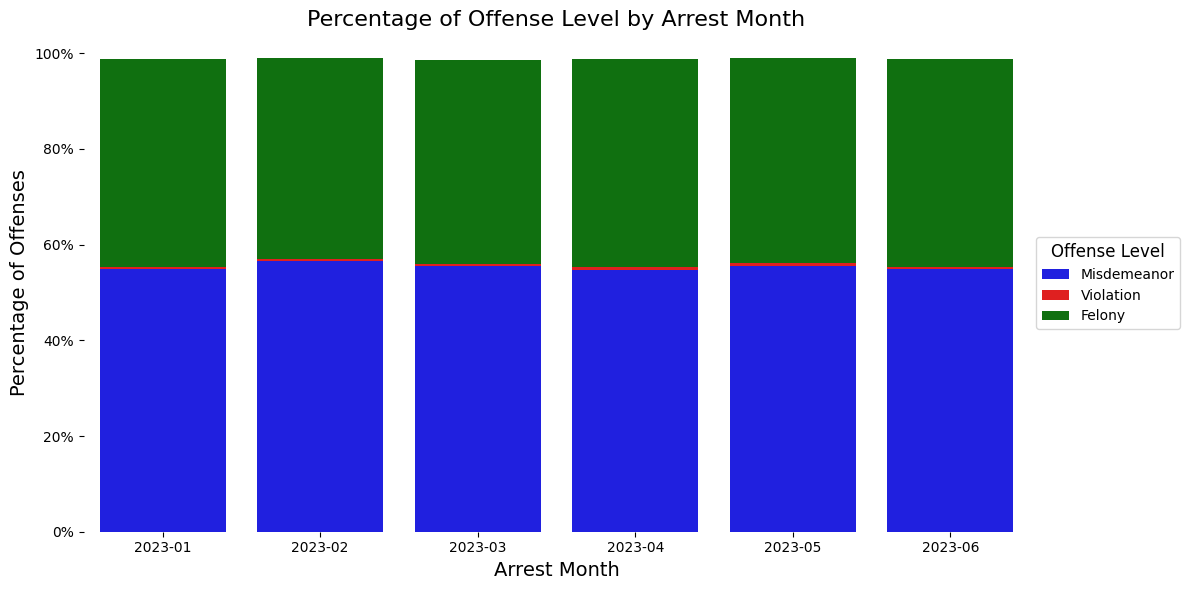

In [22]:
#Importing style libraries
import seaborn as sns
import matplotlib.ticker as mtick

#Convert arrest_date to month grouping 
df['arrest_date'] = pd.to_datetime(df['arrest_date'])
offense_counts = df.groupby([df['arrest_date'].dt.to_period('M'), 'offense_level']).size().unstack(fill_value=0)

#Calculate percentages for 100% stacked bar chart
offense_percentages = offense_counts.divide(offense_counts.sum(axis=1), axis=0)

#Reset index to convert periods to timestamps for plotting
offense_percentages = offense_percentages.reset_index()
offense_percentages['arrest_date'] = offense_percentages['arrest_date'].dt.to_timestamp()

#Creating initial figure size
f, ax = plt.subplots(figsize=(12, 6))

#Plotting arrests
sns.barplot(
    x='arrest_date',
    y='Misdemeanor',
    data=offense_percentages,
    color="b",
    label='Misdemeanor'
)

#Stacking bar chart values
sns.barplot(
    x='arrest_date',
    y='Violation',
    data=offense_percentages,
    color="r",
    label='Violation',
    bottom=offense_percentages['Misdemeanor']
)

sns.barplot(
    x='arrest_date',
    y='Felony',
    data=offense_percentages,
    color="g",
    label='Felony',
    bottom=offense_percentages['Misdemeanor'] + offense_percentages['Violation']
)

#Creating legend and axis labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Offense',
          handletextpad=0, columnspacing=1,
          loc="upper right", ncol=1, frameon=True)

#Setting Y-axis as %
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#Formatting X-axis months
ax.set_xticklabels(pd.to_datetime(offense_percentages['arrest_date']).dt.strftime('%Y-%m'))

#Font size to be consistent with first plot
ax.set_xlabel('Arrest Month', fontsize=14)
ax.set_ylabel('Percentage of Offenses', fontsize=14)
ax.set_title('Percentage of Offense Level by Arrest Month', fontsize=16)

#Legend outside chart
plt.legend(title='Offense Level', title_fontsize='large', loc='center left', bbox_to_anchor=(1, 0.5))

sns.despine(left=True, bottom=True)

#Printing plot
plt.tight_layout()
plt.show()

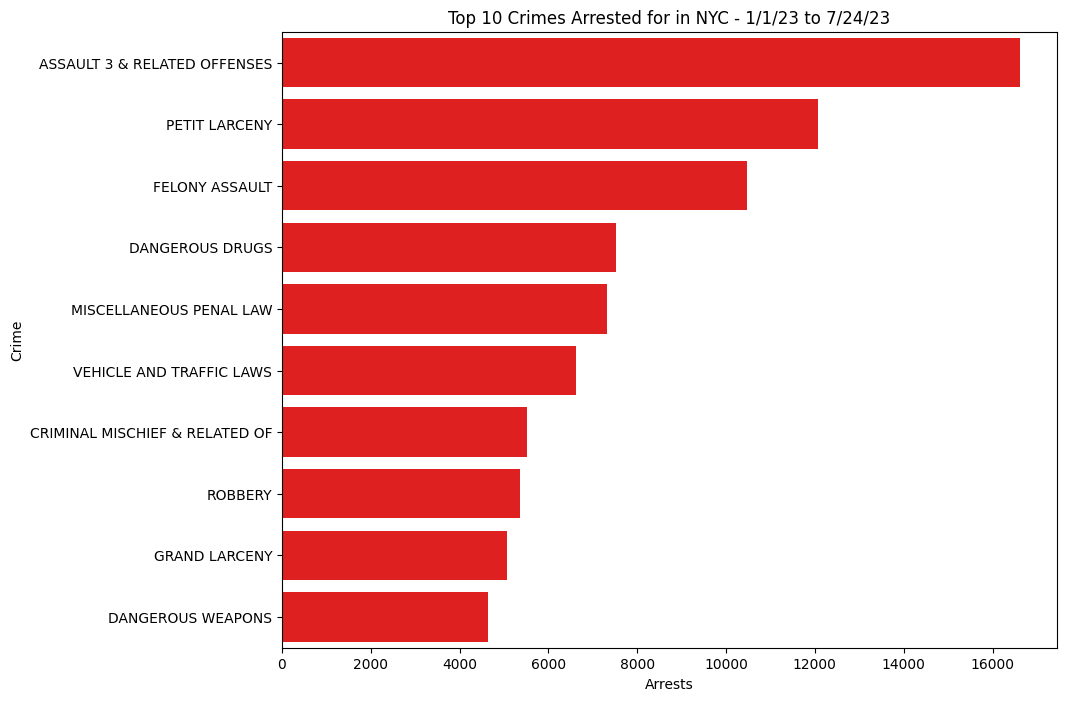

In [23]:
#Seaborn prefers dataframes to Series so I'll convert it
top_crimes_df = crime_counts.reset_index()
top_crimes_df.columns = ['Crime', 'Count']

#Setting figure size
plt.figure(figsize=(10, 8))

#Barplot that's red like previous plot
sns.barplot(
    x='Count',
    y='Crime',
    data=top_crimes_df,
    color='red'
)

#Adding axis labels and title
plt.xlabel('Arrests')
plt.ylabel('Crime')
plt.title('Top 10 Crimes Arrested for in NYC - 1/1/23 to 7/24/23')

#Displying plot
plt.show()

### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.


- Matplotlib is the basis of basic statistical plots while seaborn adds styles
- Matplotlib is slightly simpler (e.g. built in 100% stacked bar chart) while seaborn requires manual manipulations
- Seaborn is more focused on form (e.g. adding styles) than matplotlib which is more about function (simple commands)
- They each have their use; I'll likely employ a style guide if I use these professionally and be consistent with colleagues in my graphics

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

- Arrests by offense type are relatively consistent over time (+/- 10% max between dates)
- Misdemeanors account for the majority of arrests (~50%) while felonies are a clear #2 (~45%), with violations a distant #3. 
- Third degree assault is the most common crime arrested for in NYC, followed by petit larceny and felony assault. 
- This dataset has many more dimensions to explore including the location of these crimes, broken down by gender, age, sex, etc. 
- There is a more than adequate sample size here to derive conclusions, especially if there are more available data